In [1]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Reading the file
covid_cases = pd.read_csv('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')
covid_cases.head(5)

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,6/18/2020,AL,28622,28252.0,370.0,729,5.0,1129,1051.0,78.0,7,0.0,6/18/2020 0:00,Agree,Agree
1,12/1/2021,ND,163565,135705.0,27860.0,589,220.0,1907,NaN,NaN,9,0.0,12/2/2021 14:35,Agree,Not agree
2,1/2/2022,AS,11,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,1/3/2022 15:18,NaN,NaN
3,2/4/2020,AR,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,3/26/2020 16:22,Not agree,Not agree
4,5/30/2022,AK,251425,NaN,NaN,0,0.0,1252,NaN,NaN,0,0.0,5/31/2022 13:20,NaN,NaN


### Manipulating the data

In [3]:
#Converting the submission_date to a date time object
covid_cases['submission_date'] = pd.to_datetime(covid_cases['submission_date'])

#Creating the month/year column
covid_cases['month'] = covid_cases['submission_date'].dt.month
covid_cases['year'] = covid_cases['submission_date'].dt.year

covid_cases.head(5)

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths,month,year
0,2020-06-18,AL,28622,28252.0,370.0,729,5.0,1129,1051.0,78.0,7,0.0,6/18/2020 0:00,Agree,Agree,6,2020
1,2021-12-01,ND,163565,135705.0,27860.0,589,220.0,1907,NaN,NaN,9,0.0,12/2/2021 14:35,Agree,Not agree,12,2021
2,2022-01-02,AS,11,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,1/3/2022 15:18,NaN,NaN,1,2022
3,2020-02-04,AR,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,3/26/2020 16:22,Not agree,Not agree,2,2020
4,2022-05-30,AK,251425,NaN,NaN,0,0.0,1252,NaN,NaN,0,0.0,5/31/2022 13:20,NaN,NaN,5,2022


### Question: Comparing confirm cases for two different states?

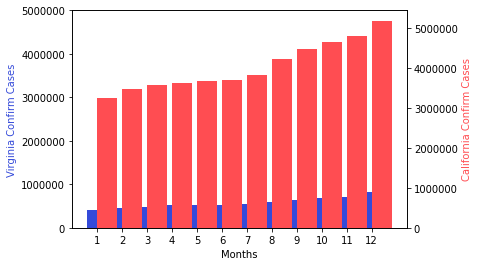

In [60]:
#Adding a function that will return the latest update for every month on the confirm cases of the state parameter
def state_conf_cases(state):
    #Filtering data so that we are looking at one state in 2021
    conf_cases = covid_cases[(covid_cases['state'] == state) & (covid_cases['year'] == 2021)]
    
    #Getting the latest confirm cases of each month
    results = conf_cases.sort_values('submission_date').groupby('month').tail(1)
    
    #Returning results
    #The results will contain the latest conf case for 12 months in the selected state
    return results

#Creating a value for all 12 months
months = range(1,13)

#Comparing confirm cases for VA vs CA
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(months, state_conf_cases('VA')['conf_cases'], color='#344ad9', label='Virginia')
ax2.bar(months, state_conf_cases('CA')['conf_cases'], align = 'edge', color='#ff4d52', label='California')

#Adding x/y labels
ax1.set_xlabel('Months')
ax1.set_ylabel('Virginia Confirm Cases', color='#344ad9')
ax2.set_ylabel('California Confirm Cases', color='#ff4d52')

#Adding the ticks
plt.xticks(months)
ax1.set_yticks(range(0,6000000,1000000))

#Removing the scientific notation from y axis
ax1.ticklabel_format(axis='y', style='plain')
ax2.ticklabel_format(axis='y', style='plain')

#Showing the graph
plt.show()

### Conlusion:
    #### Comparing to Califorinia, the confirmed cases in Virginia is way less than California
    ### Reason?
        ### Could be because california population is more than(x5) Virginia?
        ### Could it be because people in Califorinia tend to go out more than Virginia?

### Question: How many cases are happening in each state at the end of 2021?

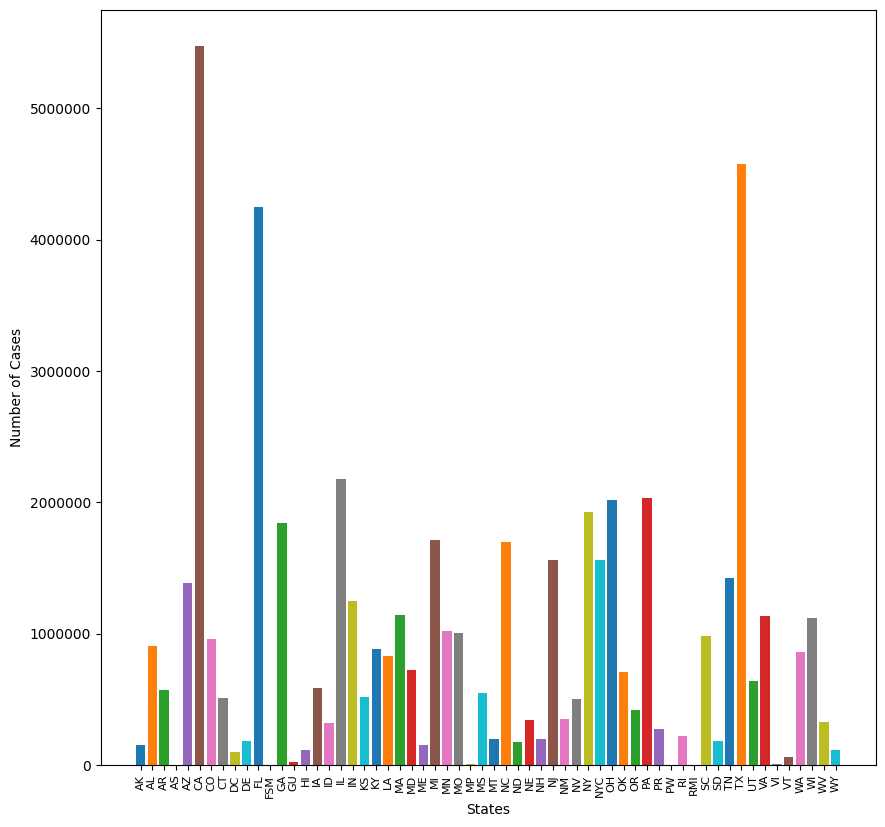

In [11]:
#Creating a function that will get the latest total cases which is on the December for each state in 2021
def state_tot_cases(state):
    #Filtering data so that we are looking at one state in 2021
    conf_cases = covid_cases[(covid_cases['state'] == state) & (covid_cases['year'] == 2021)]
    
    #Getting the latest total cases at the end of 2021
    results = conf_cases.sort_values('submission_date').groupby('month').tail(1)
    
    #Returning results
    #The results will contain the total cases at the end of the year for each state
    return results

#Creating a value that contains all the states
states = [state for state, df in covid_cases.groupby('state')]

#Changing the size of the chart
plt.figure(figsize=(10,10), dpi=100)

#Creating a loop that will go through every state and creating a graph with the total cases at the end of 2021
for state in states:
    #Plotting the bar chart
    plt.bar(state, state_tot_cases(state).iloc[-1,2])
    
#Adding the x ticks
plt.xticks(states, rotation='vertical', size=8)


#Removing the scientific notation from y axis
plt.ticklabel_format(axis='y', style='plain')

#Adding labels to x/y axis
plt.xlabel('States')
plt.ylabel('Number of Cases')

#Showing the chart
plt.show()

### Conlusion:
    #### Califorinia has the most COVID cases in 2021. Second is Texas and then florida.
    #### This could explain because these are the top 3 states with the highest population.

### Question: How many confirmed cases are reported each month in VA 2021?

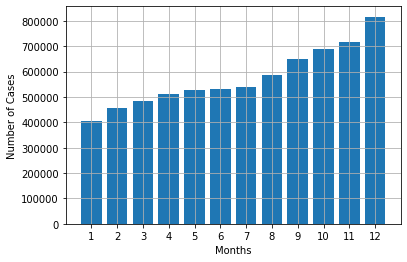

In [6]:
#Filtering data so we can have only VA state and year 2021
va_cases = covid_cases[(covid_cases['state'] == 'VA') & (covid_cases['year'] == 2021)]

#Counting the confirm cases of COVID 19 and only getting the latest value
results = va_cases.sort_values('submission_date').groupby('month').tail(1)

#Graphing the bar chart
#Creating a value for all the months
months = range(1,13)

#Graphing the bar chart
plt.bar(months, results['conf_cases'])

#Adding the ticks
plt.xticks(months)

#Adding the x/y values
plt.xlabel('Months')
plt.ylabel('Number of Cases')

#Removing the scientific notation from y axis
plt.ticklabel_format(axis='y', style='plain')

#Adding grid
plt.grid()

#Showing the chart
plt.show()

### Conlusion:
    #### As we can see, the COVID-19 cases are gradually increasing overtime.

### Question: How many deaths are happening in each state in 2021?

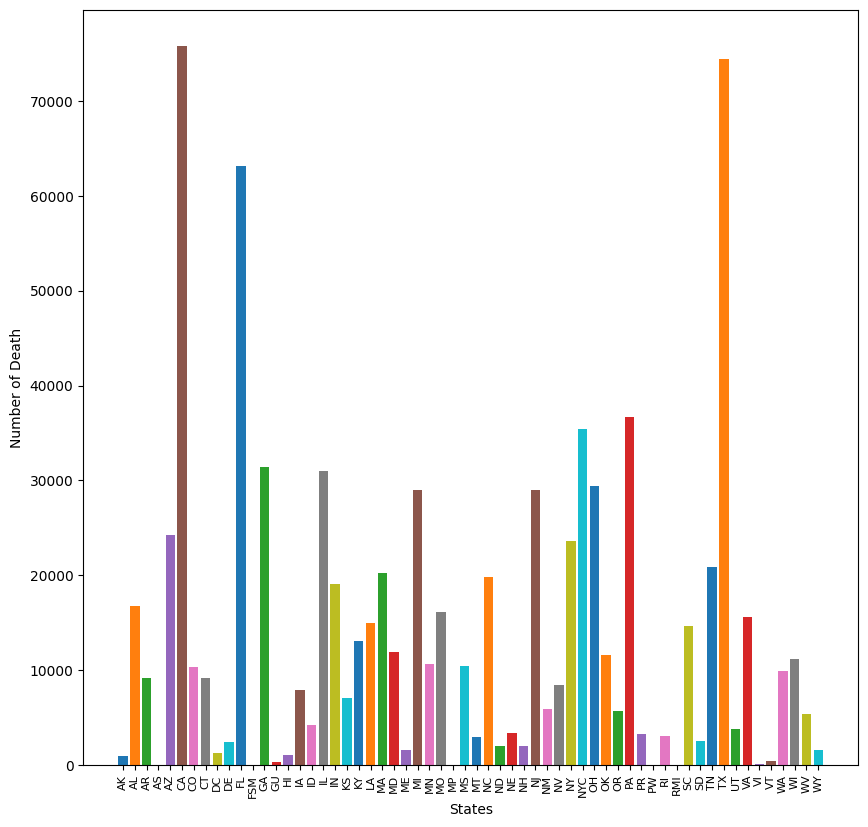

In [22]:
#For this question, we will be using the function that we already created, state_tot_cases()
#Changing the size of the chart
plt.figure(figsize=(10,10), dpi=100)

#Creating a loop that will go through every state and creating a graph with the death cases at the end of 2021
#We will also be using the value states that we already created above
for state in states:
    #Plotting the bar chart
    plt.bar(state, state_tot_cases(state).iloc[-1,7])
    
#Adding the x ticks
plt.xticks(states, rotation='vertical', size=8)

#Removing the scientific notation from y axis
plt.ticklabel_format(axis='y', style='plain')

#Adding labels to x/y axis
plt.xlabel('States')
plt.ylabel('Number of Death')

#Showing the chart
plt.show()

### Conlusion:
    #### Califorinia has the most COVID death in 2021. Second is Texas and then florida.
    #### This could explain because these are the top 3 states with the highest population.